# **Sources**
1. **ProductDB** - The product database contains teh data of all products sold by the company
2.**Resource per Product DB**-  The resouce database contains the actual recipe of resources required to create one unit of product
3. **Supplier per Resource**- Contains the supplier list and which sources is supplierd by each
4. **Supplier quantity per Resource**- Contains the data of how much resource or good was provided by each supplier
5. **Emission Factor** - Contains the applicable emission factor per region for such resource

## Ingest Product Database

In [632]:
import pandas as pd

In [633]:
#pandas show all columns
pd.set_option('display.max_columns', None)

Read CSV

In [634]:
import os

source_folder = os.path.join(os.getcwd(), 'data')

ResProdDB = pd.read_csv(os.path.join(source_folder,'Resource_per_ProductDB_ESG.csv'))

ProdDB = pd.read_csv(os.path.join(source_folder,'ProductDB_ESG.csv'))

SupResDB = pd.read_csv(os.path.join(source_folder,'Supplier_per_Resource_ESG.csv'))

SupplierQDB = pd.read_csv(os.path.join(source_folder,'Supplier_quantity_per_Resource_ESG.csv'))

EFDB = pd.read_csv(os.path.join(source_folder,'Emissionfactor_region_quantity_per_Resource_ESG.csv'))

ResProdDB: Shows which product is made of which resource and how much of each resource is required to make one unit of product

In [635]:
ResProdDB.head()

,product_id,resource_1,unit_1,value_1,resource_2,unit_2,value_2,resource_3,unit_3,value_3,resource_4,unit_4,value_4,resource_5,unit_5,value_5,resource_6,unit_6,value_6,resource_7,unit_7,value_7,resource_8,unit_8,value_8
0,12893ASKJFH,True,lb,8.40,False,NaN,NaN,True,lb,9.74,True,lb,9.67,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,kg,9.84
1,1893IZRHD,True,kg,5.40,True,lb,5.91,False,NaN,NaN,True,lb,5.53,True,kg,5.80,False,NaN,NaN,False,NaN,NaN,True,kg,6.10
2,1234DDDFE,False,NaN,NaN,True,kg,5.56,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,lb,8.10
3,1485DJJWHER,False,NaN,NaN,True,lb,9.76,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,lb,8.33,False,NaN,NaN,False,NaN,NaN
4,1389ASIQUH,True,kg,6.18,True,lb,6.76,True,kg,7.18,True,kg,6.94,True,kg,9.87,True,lb,5.92,True,kg,6.68,True,kg,9.15


In [636]:
ResProdDB.isnull().sum()

product_id     4
resource_1     4
unit_1         7
value_1        7
resource_2     4
unit_2         7
value_2        7
resource_3     4
unit_3        10
value_3       10
resource_4     4
unit_4        10
value_4       10
resource_5     4
unit_5         9
value_5        9
resource_6     4
unit_6         9
value_6        9
resource_7     4
unit_7        10
value_7       10
resource_8     4
unit_8         7
value_8        7
dtype: int64

In [637]:
#drop where prod_id is null
ResProdDB.dropna(subset=['product_id'], inplace=True)

In [638]:
ResProdDB[[f"resource_{i}" for i in range(1,9)]] = ResProdDB[[f"resource_{i}" for i in range(1,9)]].fillna(value=False) #set resources that are NaN to False

In [639]:
#remove all where resource is True but there are not values for unit or value for the given resource
for i in range(1,9):
    ResProdDB = ResProdDB[~((ResProdDB[f"resource_{i}"]==True) & (ResProdDB[f"unit_{i}"].isnull() | ResProdDB[f"value_{i}"].isnull()))]

In [640]:
ResProdDB

,product_id,resource_1,unit_1,value_1,resource_2,unit_2,value_2,resource_3,unit_3,value_3,resource_4,unit_4,value_4,resource_5,unit_5,value_5,resource_6,unit_6,value_6,resource_7,unit_7,value_7,resource_8,unit_8,value_8
0,12893ASKJFH,True,lb,8.40,False,NaN,NaN,True,lb,9.74,True,lb,9.67,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,kg,9.84
1,1893IZRHD,True,kg,5.40,True,lb,5.91,False,NaN,NaN,True,lb,5.53,True,kg,5.80,False,NaN,NaN,False,NaN,NaN,True,kg,6.10
2,1234DDDFE,False,NaN,NaN,True,kg,5.56,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,lb,8.10
3,1485DJJWHER,False,NaN,NaN,True,lb,9.76,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,lb,8.33,False,NaN,NaN,False,NaN,NaN
4,1389ASIQUH,True,kg,6.18,True,lb,6.76,True,kg,7.18,True,kg,6.94,True,kg,9.87,True,lb,5.92,True,kg,6.68,True,kg,9.15
5,1845JGDAA,True,kg,9.41,False,NaN,NaN,True,lb,8.92,False,NaN,NaN,False,NaN,NaN,True,lb,5.21,False,NaN,NaN,True,lb,7.84
6,183ZZEUH,False,NaN,NaN,True,kg,8.16,False,NaN,NaN,True,lb,9.95,True,lb,9.77,False,NaN,NaN,True,kg,9.84,False,NaN,NaN
7,1892SHAJ,True,lb,5.60,True,lb,6.32,True,kg,9.48,False,NaN,NaN,True,kg,9.83,True,lb,7.95,True,kg,6.64,True,lb,9.80
8,1238JAJGD,True,lb,7.62,True,kg,7.69,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,kg,5.03,False,NaN,NaN
9,1894NHFE,True,kg,9.53,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,lb,5.02,True,lb,6.52,False,NaN,NaN,True,lb,5.02


In [641]:
#convert all to kg
for i in range(1,9):
    ResProdDB[f"value_{i}"] = ResProdDB.apply(lambda x: x[f"value_{i}"] if x[f"unit_{i}"] == "kg" else x[f"value_{i}"]*0.453592, axis=1)

In [642]:
#drop all unit columns
ResProdDB = ResProdDB.drop(columns=[f"unit_{i}" for i in range(1,9)])

In [643]:
#drop all resource columns
ResProdDB = ResProdDB.drop(columns=[f"resource_{i}" for i in range(1,9)])

In [644]:
#rename all value columns to resource_in_kg
ResProdDB = ResProdDB.rename(columns={f"value_{i}": f"resource_{i}_in_kg" for i in range(1,9)})

In [645]:
ResProdDB

,product_id,resource_1_in_kg,resource_2_in_kg,resource_3_in_kg,resource_4_in_kg,resource_5_in_kg,resource_6_in_kg,resource_7_in_kg,resource_8_in_kg
0,12893ASKJFH,3.810173,NaN,4.417986,4.386235,NaN,NaN,NaN,9.840000
1,1893IZRHD,5.400000,2.680729,NaN,2.508364,5.800000,NaN,NaN,6.100000
2,1234DDDFE,NaN,5.560000,NaN,NaN,NaN,NaN,NaN,3.674095
3,1485DJJWHER,NaN,4.427058,NaN,NaN,NaN,3.778421,NaN,NaN
4,1389ASIQUH,6.180000,3.066282,7.180000,6.940000,9.870000,2.685265,6.68,9.150000
5,1845JGDAA,9.410000,NaN,4.046041,NaN,NaN,2.363214,NaN,3.556161
6,183ZZEUH,NaN,8.160000,NaN,4.513240,4.431594,NaN,9.84,NaN
7,1892SHAJ,2.540115,2.866701,9.480000,NaN,9.830000,3.606056,6.64,4.445202
8,1238JAJGD,3.456371,7.690000,NaN,NaN,NaN,NaN,5.03,NaN
9,1894NHFE,9.530000,NaN,NaN,NaN,2.277032,2.957420,NaN,2.277032


ProdDB: shows how much of each product was made at a particular date

In [646]:
ProdDB.head()

,id,product_name,quantity,unit,date
0,1238JAJGD,tri bike,57.0,units,9/14/2021
1,1893IZRHD,mono bike,95.0,units,3/28/2022
2,12893ASKJFH,dirt bike,46.0,units,3/2/2021
3,1894NHFE,sand bike,35.0,units,4/15/2022
4,1238JAJGD,tri bike,65.0,units,2/7/2021


In [647]:
ProdDB.isnull().sum()

id              25
product_name     0
quantity        25
unit            25
date             0
dtype: int64

In [648]:
ProdDB.dropna(inplace=True) #all of the columns are needed

In [649]:
ProdDB.dtypes

id               object
product_name     object
quantity        float64
unit             object
date             object
dtype: object

In [650]:
#date to datetime
ProdDB['date'] = pd.to_datetime(ProdDB['date'])

In [651]:
ProdDB

,id,product_name,quantity,unit,date
0,1238JAJGD,tri bike,57.0,units,2021-09-14
1,1893IZRHD,mono bike,95.0,units,2022-03-28
2,12893ASKJFH,dirt bike,46.0,units,2021-03-02
3,1894NHFE,sand bike,35.0,units,2022-04-15
4,1238JAJGD,tri bike,65.0,units,2021-02-07
...,...,...,...,...,...
995,1845JGDAA,bike,81.0,units,2022-05-11
996,1845JGDAA,bike,107.0,units,2022-03-15
997,12893ASKJFH,dirt bike,72.0,units,2022-07-18
998,183ZZEUH,grass bike,47.0,units,2020-09-11


SupResDB: Gives information about the supplier of each resource -> which supplier provides which resource

In [652]:
SupResDB.head()

,supplier_id,supplier_name,region,resource_1,resource_2,resource_3,resource_4,resource_5,resource_6,resource_7,resource_8
0,30-713-0521,Waters-Crist,Indonesia,False,False,False,False,False,False,True,False
1,24-904-8805,Turner-Crooks,Moldova,True,False,True,False,True,True,True,False
2,19-648-8958,"Aufderhar, Goldner and Strosin",China,False,False,True,True,False,True,False,True
3,66-713-1602,Skiles-Turner,Peru,False,False,True,False,True,True,True,True
4,97-801-6999,Cartwright LLC,Uzbekistan,False,True,False,True,False,False,False,True


In [653]:
SupResDB.isnull().sum()

supplier_id      0
supplier_name    0
region           0
resource_1       0
resource_2       0
resource_3       0
resource_4       0
resource_5       0
resource_6       0
resource_7       0
resource_8       0
dtype: int64

SupplierQDB: shows how much of each resource was provided by each supplier at a particular date

In [654]:
SupplierQDB.head()

,supplier_id,resource_1,unit_1,value_1,resource_2,unit_2,value_2,resource_3,unit_3,value_3,resource_4,unit_4,value_4,resource_5,unit_5,value_5,resource_6,unit_6,value_6,resource_7,unit_7,value_7,resource_8,unit_8,value_8,date
0,08-639-9549,True,kg,84.63,True,lbs,299.0,True,lbs,927.0,True,lbs,250.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,lbs,380.0,1/12/2022
1,91-297-4557,True,lbs,95.90,True,lbs,204.0,True,kg,886.0,True,lbs,278.0,True,lbs,1909.0,True,kg,412.0,True,kg,391.0,True,kg,337.0,11/2/2020
2,28-904-6879,True,lbs,79.02,True,kg,289.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,True,lbs,413.0,True,kg,520.0,True,kg,321.0,1/5/2022
3,28-904-6879,True,kg,91.90,False,NaN,NaN,False,NaN,NaN,True,lbs,162.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,2/24/2020
4,08-639-9549,True,lbs,64.14,True,lbs,301.0,True,lbs,836.0,True,kg,166.0,True,kg,1172.0,True,lbs,398.0,False,NaN,NaN,True,lbs,316.0,5/31/2020


In [655]:
SupplierQDB.isnull().sum()

supplier_id      0
resource_1       0
unit_1         505
value_1        505
resource_2       0
unit_2         505
value_2        505
resource_3       0
unit_3         504
value_3        504
resource_4       0
unit_4         479
value_4        479
resource_5       0
unit_5         515
value_5        515
resource_6       0
unit_6         496
value_6        496
resource_7       0
unit_7         514
value_7        514
resource_8       0
unit_8         482
value_8        482
date             0
dtype: int64

In [656]:
#drop again where resource is True but there are not values for unit or value for the given resource
for i in range(1,9):
    SupplierQDB = SupplierQDB[~((SupplierQDB[f"resource_{i}"]==True) & (SupplierQDB[f"unit_{i}"].isnull() | SupplierQDB[f"value_{i}"].isnull()))]

In [657]:
#convert to kg
for i in range(1,9):
    SupplierQDB[f"value_{i}"] = SupplierQDB.apply(lambda x: x[f"value_{i}"] if x[f"unit_{i}"] == "kg" else x[f"value_{i}"]*0.453592, axis=1)

#drop all unit columns
SupplierQDB = SupplierQDB.drop(columns=[f"unit_{i}" for i in range(1,9)])
#drop all resource columns
SupplierQDB = SupplierQDB.drop(columns=[f"resource_{i}" for i in range(1,9)])
#rename all value columns to resource_in_kg
SupplierQDB = SupplierQDB.rename(columns={f"value_{i}": f"resource_{i}_in_kg" for i in range(1,9)})

In [658]:
#convert date to datetime
SupplierQDB['date'] = pd.to_datetime(SupplierQDB['date'])

In [659]:
SupplierQDB

,supplier_id,resource_1_in_kg,resource_2_in_kg,resource_3_in_kg,resource_4_in_kg,resource_5_in_kg,resource_6_in_kg,resource_7_in_kg,resource_8_in_kg,date
0,08-639-9549,84.630000,135.624008,420.479784,113.398000,NaN,NaN,NaN,172.364960,2022-01-12
1,91-297-4557,43.499473,92.532768,886.000000,126.098576,865.907128,412.000000,391.000000,337.000000,2020-11-02
2,28-904-6879,35.842840,289.000000,NaN,NaN,NaN,187.333496,520.000000,321.000000,2022-01-05
3,28-904-6879,91.900000,NaN,NaN,73.481904,NaN,NaN,NaN,NaN,2020-02-24
4,08-639-9549,29.093391,136.531192,379.202912,166.000000,1172.000000,180.529616,NaN,143.335072,2020-05-31
...,...,...,...,...,...,...,...,...,...,...
995,98-927-4468,45.304769,NaN,NaN,230.000000,832.341320,368.000000,NaN,152.860504,2021-07-08
996,98-927-4468,78.540000,198.000000,435.901912,NaN,1343.000000,NaN,251.289968,NaN,2020-03-01
997,28-904-6879,53.160000,487.000000,NaN,NaN,653.626072,433.000000,170.097000,141.520704,2021-10-07
998,91-297-4557,NaN,204.569992,NaN,88.904032,NaN,198.219704,NaN,356.000000,2022-06-30


EFDB: shows the emission factor for each resource in each region

In [660]:
EFDB.head()

,region,resource_1,emission_factor_1_lb,emission_factor_1_kg,resource_2,emission_factor_2_lb,emission_factor_2_kg,resource_3,emission_factor_3_lb,emission_factor_3_kg,resource_4,emission_factor_4_lb,emission_factor_4_kg,resource_5,emission_factor_5_lb,emission_factor_5_kg,resource_6,emission_factor_6_lb,emission_factor_6_kg,resource_7,emission_factor_7_lb,emission_factor_7_kg,resource_8,emission_factor_8_lb,emission_factor_8_kg
0,Indonesia,1,32.09,5.53,1,5.26,2.30,1,20.70,1.57,1,62.13,7.19,1,134.87,73.20,1,103.46,30.44,1,124.03,27.22,1,197.06,32.36
1,Moldova,1,35.71,7.97,1,6.05,1.71,1,23.10,2.25,1,83.49,7.41,1,166.11,93.84,1,123.68,45.86,1,122.55,66.87,1,125.75,33.25
2,China,1,57.44,3.69,1,6.18,2.07,1,21.30,4.48,1,76.08,5.47,1,111.50,89.12,1,139.24,18.09,1,127.74,85.91,1,163.43,21.42
3,Peru,1,39.26,1.18,1,5.82,1.04,1,10.73,3.65,1,88.38,8.04,1,196.88,88.65,1,142.88,40.46,1,125.84,43.78,1,185.65,28.09
4,Uzbekistan,1,26.62,6.75,1,9.22,2.47,1,22.65,1.36,1,65.73,5.48,1,198.91,85.85,1,140.88,34.94,1,130.13,35.27,1,158.52,21.53


In [661]:
EFDB.isnull().sum()

region                  0
resource_1              0
emission_factor_1_lb    0
emission_factor_1_kg    0
resource_2              0
emission_factor_2_lb    0
emission_factor_2_kg    0
resource_3              0
emission_factor_3_lb    0
emission_factor_3_kg    0
resource_4              0
emission_factor_4_lb    0
emission_factor_4_kg    0
resource_5              0
emission_factor_5_lb    0
emission_factor_5_kg    0
resource_6              0
emission_factor_6_lb    0
emission_factor_6_kg    0
resource_7              0
emission_factor_7_lb    0
emission_factor_7_kg    0
resource_8              0
emission_factor_8_lb    0
emission_factor_8_kg    0
dtype: int64

In [662]:
#drop all resource columns
EFDB.drop(columns=[f"resource_{i}" for i in range(1,9)],inplace=True)
EFDB.drop(columns=[f"emission_factor_{i}_lb" for i in range(1,9)],inplace=True)


In [663]:
#rename all value columns to emission_factor_in_kg_ressource_
EFDB = EFDB.rename(columns={f"emission_factor_{i}_kg": f"emission_factor_in_kg_resource_{i}" for i in range(1,9)})

In [664]:
EFDB

,region,emission_factor_in_kg_resource_1,emission_factor_in_kg_resource_2,emission_factor_in_kg_resource_3,emission_factor_in_kg_resource_4,emission_factor_in_kg_resource_5,emission_factor_in_kg_resource_6,emission_factor_in_kg_resource_7,emission_factor_in_kg_resource_8
0,Indonesia,5.53,2.30,1.57,7.19,73.20,30.44,27.22,32.36
1,Moldova,7.97,1.71,2.25,7.41,93.84,45.86,66.87,33.25
2,China,3.69,2.07,4.48,5.47,89.12,18.09,85.91,21.42
3,Peru,1.18,1.04,3.65,8.04,88.65,40.46,43.78,28.09
4,Uzbekistan,6.75,2.47,1.36,5.48,85.85,34.94,35.27,21.53
5,Indonesia,6.48,1.11,2.62,6.02,83.72,23.32,80.82,19.17
6,Portugal,4.53,2.83,1.46,7.41,99.13,21.01,19.25,33.31
7,Serbia,7.97,1.15,2.14,6.35,74.68,39.98,23.98,31.35
8,Poland,1.91,1.79,4.80,7.19,71.65,22.50,69.71,21.49
9,Thailand,9.68,2.38,1.65,7.11,93.51,41.93,17.49,36.60


In [665]:
EFDB['region'].value_counts()

Indonesia     2
Moldova       1
China         1
Peru          1
Uzbekistan    1
Portugal      1
Serbia        1
Poland        1
Thailand      1
Name: region, dtype: int64

In [666]:
#select where region is indonesia
EFDB[EFDB['region']=='Indonesia']

,region,emission_factor_in_kg_resource_1,emission_factor_in_kg_resource_2,emission_factor_in_kg_resource_3,emission_factor_in_kg_resource_4,emission_factor_in_kg_resource_5,emission_factor_in_kg_resource_6,emission_factor_in_kg_resource_7,emission_factor_in_kg_resource_8
0,Indonesia,5.53,2.30,1.57,7.19,73.20,30.44,27.22,32.36
5,Indonesia,6.48,1.11,2.62,6.02,83.72,23.32,80.82,19.17


In [667]:
#groupy by region and take the average of the emission factors, keep the resource columns as they are the same for all rows
EFDB = EFDB.groupby('region').mean()

In [668]:
#make sure that if there are regions that are in the list more than once, to average the values for the emissions factors keep the rest
EFDB

,emission_factor_in_kg_resource_1,emission_factor_in_kg_resource_2,emission_factor_in_kg_resource_3,emission_factor_in_kg_resource_4,emission_factor_in_kg_resource_5,emission_factor_in_kg_resource_6,emission_factor_in_kg_resource_7,emission_factor_in_kg_resource_8
region,,,,,,,,
China,3.690,2.070,4.480,5.470,89.12,18.09,85.91,21.420
Indonesia,6.005,1.705,2.095,6.605,78.46,26.88,54.02,25.765
Moldova,7.970,1.710,2.250,7.410,93.84,45.86,66.87,33.250
Peru,1.180,1.040,3.650,8.040,88.65,40.46,43.78,28.090
Poland,1.910,1.790,4.800,7.190,71.65,22.50,69.71,21.490
Portugal,4.530,2.830,1.460,7.410,99.13,21.01,19.25,33.310
Serbia,7.970,1.150,2.140,6.350,74.68,39.98,23.98,31.350
Thailand,9.680,2.380,1.650,7.110,93.51,41.93,17.49,36.600
Uzbekistan,6.750,2.470,1.360,5.480,85.85,34.94,35.27,21.530


In [669]:
EFDB.reset_index(inplace=True)

In [670]:
#reoder the table so that for each resource there is column for the emission factor lb and kg
EFDB_df = pd.DataFrame({'resources':[f"resource_{i}" for i in range(1,9)]*9, 'region':EFDB['region'].tolist()*8})
EFDB_df

,resources,region
0,resource_1,China
1,resource_2,Indonesia
2,resource_3,Moldova
3,resource_4,Peru
4,resource_5,Poland
...,...,...
67,resource_4,Poland
68,resource_5,Portugal
69,resource_6,Serbia
70,resource_7,Thailand


In [671]:
#get the emission factors for each resource and unit from the EFDB table using apply
EFDB_df['emission_per_kg'] = EFDB_df.apply(lambda x: EFDB[EFDB['region']==x['region']][f"emission_factor_in_kg_resource_{x['resources'].split('_')[-1]}"].sum(), axis=1)

In [672]:
EFDB_df

,resources,region,emission_per_kg
0,resource_1,China,3.690
1,resource_2,Indonesia,1.705
2,resource_3,Moldova,2.250
3,resource_4,Peru,8.040
4,resource_5,Poland,71.650
...,...,...,...
67,resource_4,Poland,7.190
68,resource_5,Portugal,99.130
69,resource_6,Serbia,39.980
70,resource_7,Thailand,17.490


## 1. Combine Ressources and Products to create emssions per day

In [673]:
# joing ResProdDB to ProdDB
ProdDBxRes = ProdDB.set_index("id").join(ResProdDB.set_index("product_id"))
ProdDBxRes.head()

,product_name,quantity,unit,date,resource_1_in_kg,resource_2_in_kg,resource_3_in_kg,resource_4_in_kg,resource_5_in_kg,resource_6_in_kg,resource_7_in_kg,resource_8_in_kg
1234DDDFE,mountain bike,50.0,units,2021-09-09,NaN,5.56,NaN,NaN,NaN,NaN,NaN,3.674095
1234DDDFE,mountain bike,77.0,units,2022-04-14,NaN,5.56,NaN,NaN,NaN,NaN,NaN,3.674095
1234DDDFE,mountain bike,75.0,units,2020-08-18,NaN,5.56,NaN,NaN,NaN,NaN,NaN,3.674095
1234DDDFE,mountain bike,138.0,units,2021-01-09,NaN,5.56,NaN,NaN,NaN,NaN,NaN,3.674095
1234DDDFE,mountain bike,88.0,units,2020-04-24,NaN,5.56,NaN,NaN,NaN,NaN,NaN,3.674095


In [674]:
#drop unit
ProdDBxRes.drop(columns=['unit'],inplace=True)

In [675]:
ProdDBxRes.isnull().sum()

product_name          0
quantity              0
date                  0
resource_1_in_kg    283
resource_2_in_kg    302
resource_3_in_kg    581
resource_4_in_kg    587
resource_5_in_kg    475
resource_6_in_kg    494
resource_7_in_kg    573
resource_8_in_kg    291
dtype: int64

In [676]:
# groupyby index and date and sum quantity and keep the first value of the other columns
GroupedProdRes = ProdDBxRes.groupby([ProdDBxRes.index,"date"]).sum()
GroupedProdRes #table summed the quanity if a product was manufactured multiple times on the same day

quantity  resource_1_in_kg  resource_2_in_kg  \
          date                                                       
1234DDDFE 2020-01-03      43.0              0.00              5.56   
          2020-01-19      55.0              0.00              5.56   
          2020-01-25     113.0              0.00              5.56   
          2020-01-26     143.0              0.00              5.56   
          2020-02-02      89.0              0.00              5.56   
...                        ...               ...               ...   
1894NHFE  2022-05-30     165.0             19.06              0.00   
          2022-06-04     120.0              9.53              0.00   
          2022-07-01     121.0              9.53              0.00   
          2022-07-04     107.0              9.53              0.00   
          2022-07-17      79.0              9.53              0.00   

                      resource_3_in_kg  resource_4_in_kg  resource_5_in_kg  \
          date                                                               
1234DDDFE 2020-01-03               0.0               0.0          0.000000   
          2020-01-19               0.0               0.0          0.000000   
          2020-01-25               0.0               0.0          0.000000   
          2020-01-26               0.0               0.0          0.000000   
          2020-02-02               0.0               0.0          0.000000   
...                                ...               ...               ...   
1894NHFE  2022-05-30               0.0               0.0          4.554064   
          2022-06-04               0.0               0.0          2.277032   
          2022-07-01               0.0               0.0          2.277032   
          2022-07-04               0.0               0.0          2.277032   
          2022-07-17               0.0               0.0          2.277032   

                      resource_6_in_kg  resource_7_in_kg  resource_8_in_kg  
          date                                                              
1234DDDFE 2020-01-03           0.00000               0.0          3.674095  
          2020-01-19           0.00000               0.0          3.674095  
          2020-01-25           0.00000               0.0          3.674095  
          2020-01-26           0.00000               0.0          3.674095  
          2020-02-02           0.00000               0.0          3.674095  
...                                ...               ...               ...  
1894NHFE  2022-05-30           5.91484               0.0          4.554064  
          2022-06-04           2.95742               0.0          2.277032  
          2022-07-01           2.95742               0.0          2.277032  
          2022-07-04           2.95742               0.0          2.277032  
          2022-07-17           2.95742               0.0          2.277032  

[924 rows x 9 columns]

In [677]:
# multiply the quantity with the value of the resource if the resource is True
ProdResMultiplied = GroupedProdRes.copy()
for i in range(1,9):
    ProdResMultiplied[f"total_kg_ressource_{i}"] = ProdResMultiplied["quantity"] * ProdResMultiplied[f"resource_{i}_in_kg"]
ProdResMultiplied.drop(columns=['quantity'],inplace=True)
ProdResMultiplied.drop(columns=[f"resource_{i}_in_kg" for i in range(1,9)],inplace=True)

In [678]:
ProdResMultiplied

total_kg_ressource_1  total_kg_ressource_2  \
          date                                                     
1234DDDFE 2020-01-03                  0.00                239.08   
          2020-01-19                  0.00                305.80   
          2020-01-25                  0.00                628.28   
          2020-01-26                  0.00                795.08   
          2020-02-02                  0.00                494.84   
...                                    ...                   ...   
1894NHFE  2022-05-30               3144.90                  0.00   
          2022-06-04               1143.60                  0.00   
          2022-07-01               1153.13                  0.00   
          2022-07-04               1019.71                  0.00   
          2022-07-17                752.87                  0.00   

                      total_kg_ressource_3  total_kg_ressource_4  \
          date                                                     
1234DDDFE 2020-01-03                   0.0                   0.0   
          2020-01-19                   0.0                   0.0   
          2020-01-25                   0.0                   0.0   
          2020-01-26                   0.0                   0.0   
          2020-02-02                   0.0                   0.0   
...                                    ...                   ...   
1894NHFE  2022-05-30                   0.0                   0.0   
          2022-06-04                   0.0                   0.0   
          2022-07-01                   0.0                   0.0   
          2022-07-04                   0.0                   0.0   
          2022-07-17                   0.0                   0.0   

                      total_kg_ressource_5  total_kg_ressource_6  \
          date                                                     
1234DDDFE 2020-01-03              0.000000              0.000000   
          2020-01-19              0.000000              0.000000   
          2020-01-25              0.000000              0.000000   
          2020-01-26              0.000000              0.000000   
          2020-02-02              0.000000              0.000000   
...                                    ...                   ...   
1894NHFE  2022-05-30            751.420507            975.948547   
          2022-06-04            273.243821            354.890381   
          2022-07-01            275.520853            357.847801   
          2022-07-04            243.642407            316.443923   
          2022-07-17            179.885515            233.636167   

                      total_kg_ressource_7  total_kg_ressource_8  
          date                                                    
1234DDDFE 2020-01-03                   0.0            157.986094  
          2020-01-19                   0.0            202.075236  
          2020-01-25                   0.0            415.172758  
          2020-01-26                   0.0            525.395614  
          2020-02-02                   0.0            326.994473  
...                                    ...                   ...  
1894NHFE  2022-05-30                   0.0            751.420507  
          2022-06-04                   0.0            273.243821  
          2022-07-01                   0.0            275.520853  
          2022-07-04                   0.0            243.642407  
          2022-07-17                   0.0            179.885515  

[924 rows x 8 columns]

### Quick Test of the database

Show the quanity of resources for product 1234DDDFE

In [679]:
product_id = "1234DDDFE"
print("Product: ", product_id)
for i in range(1,9):
    if ProdResMultiplied.loc[product_id][f"total_kg_ressource_{i}"].sum() >= 1: #makes sure that the resource is used
        print(f'Ressource_{i}: {ProdResMultiplied.loc[product_id][f"total_kg_ressource_{i}"].sum()} kg')

Product:  1234DDDFE
Ressource_2: 48583.28 kg
Ressource_8: 32104.2438576 kg


Show the value of ressource_2 for product 1894NHFE from 2022-05-01 to 2022-05-31

In [680]:
ProdResMultiplied.loc[product_id]["2022-05-01":"2022-05-31"]["total_kg_ressource_2"].sum()

1195.4

## Join SupplierQDB with emssions

goal: get a table with the total quantity of each product for a specific date and regio: how much of resource 1 came from which region at which date

In [681]:
SupplierQDBXRes = SupplierQDB.set_index("supplier_id").join(SupResDB.set_index("supplier_id")['region']).reset_index()
SupplierQDBXRes

,supplier_id,resource_1_in_kg,resource_2_in_kg,resource_3_in_kg,resource_4_in_kg,resource_5_in_kg,resource_6_in_kg,resource_7_in_kg,resource_8_in_kg,date,region
0,08-639-9549,84.630000,135.624008,420.479784,113.398000,NaN,NaN,NaN,172.364960,2022-01-12,Poland
1,08-639-9549,29.093391,136.531192,379.202912,166.000000,1172.000000,180.529616,NaN,143.335072,2020-05-31,Poland
2,08-639-9549,30.159332,NaN,441.798608,92.079176,NaN,411.000000,166.014672,164.200304,2020-01-22,Poland
3,08-639-9549,36.169426,NaN,NaN,189.000000,NaN,NaN,697.000000,NaN,2022-03-28,Poland
4,08-639-9549,NaN,NaN,NaN,189.000000,NaN,NaN,NaN,306.000000,2020-02-22,Poland
...,...,...,...,...,...,...,...,...,...,...,...
995,98-927-4468,NaN,354.000000,975.000000,NaN,NaN,NaN,540.000000,167.375448,2020-07-19,Indonesia
996,98-927-4468,NaN,NaN,NaN,115.665960,NaN,176.900880,NaN,NaN,2021-10-14,Indonesia
997,98-927-4468,58.120000,NaN,868.000000,NaN,715.768176,220.445712,NaN,NaN,2021-08-15,Indonesia
998,98-927-4468,45.304769,NaN,NaN,230.000000,832.341320,368.000000,NaN,152.860504,2021-07-08,Indonesia


In [682]:
EFDB

,region,emission_factor_in_kg_resource_1,emission_factor_in_kg_resource_2,emission_factor_in_kg_resource_3,emission_factor_in_kg_resource_4,emission_factor_in_kg_resource_5,emission_factor_in_kg_resource_6,emission_factor_in_kg_resource_7,emission_factor_in_kg_resource_8
0,China,3.690,2.070,4.480,5.470,89.12,18.09,85.91,21.420
1,Indonesia,6.005,1.705,2.095,6.605,78.46,26.88,54.02,25.765
2,Moldova,7.970,1.710,2.250,7.410,93.84,45.86,66.87,33.250
3,Peru,1.180,1.040,3.650,8.040,88.65,40.46,43.78,28.090
4,Poland,1.910,1.790,4.800,7.190,71.65,22.50,69.71,21.490
5,Portugal,4.530,2.830,1.460,7.410,99.13,21.01,19.25,33.310
6,Serbia,7.970,1.150,2.140,6.350,74.68,39.98,23.98,31.350
7,Thailand,9.680,2.380,1.650,7.110,93.51,41.93,17.49,36.600
8,Uzbekistan,6.750,2.470,1.360,5.480,85.85,34.94,35.27,21.530


In [683]:
SuppliedWithEmission = SupplierQDBXRes.join(EFDB.set_index("region"),on="region")
SuppliedWithEmission

,supplier_id,resource_1_in_kg,resource_2_in_kg,resource_3_in_kg,resource_4_in_kg,resource_5_in_kg,resource_6_in_kg,resource_7_in_kg,resource_8_in_kg,date,region,emission_factor_in_kg_resource_1,emission_factor_in_kg_resource_2,emission_factor_in_kg_resource_3,emission_factor_in_kg_resource_4,emission_factor_in_kg_resource_5,emission_factor_in_kg_resource_6,emission_factor_in_kg_resource_7,emission_factor_in_kg_resource_8
0,08-639-9549,84.630000,135.624008,420.479784,113.398000,NaN,NaN,NaN,172.364960,2022-01-12,Poland,1.910,1.790,4.800,7.190,71.65,22.50,69.71,21.490
1,08-639-9549,29.093391,136.531192,379.202912,166.000000,1172.000000,180.529616,NaN,143.335072,2020-05-31,Poland,1.910,1.790,4.800,7.190,71.65,22.50,69.71,21.490
2,08-639-9549,30.159332,NaN,441.798608,92.079176,NaN,411.000000,166.014672,164.200304,2020-01-22,Poland,1.910,1.790,4.800,7.190,71.65,22.50,69.71,21.490
3,08-639-9549,36.169426,NaN,NaN,189.000000,NaN,NaN,697.000000,NaN,2022-03-28,Poland,1.910,1.790,4.800,7.190,71.65,22.50,69.71,21.490
4,08-639-9549,NaN,NaN,NaN,189.000000,NaN,NaN,NaN,306.000000,2020-02-22,Poland,1.910,1.790,4.800,7.190,71.65,22.50,69.71,21.490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,98-927-4468,NaN,354.000000,975.000000,NaN,NaN,NaN,540.000000,167.375448,2020-07-19,Indonesia,6.005,1.705,2.095,6.605,78.46,26.88,54.02,25.765
996,98-927-4468,NaN,NaN,NaN,115.665960,NaN,176.900880,NaN,NaN,2021-10-14,Indonesia,6.005,1.705,2.095,6.605,78.46,26.88,54.02,25.765
997,98-927-4468,58.120000,NaN,868.000000,NaN,715.768176,220.445712,NaN,NaN,2021-08-15,Indonesia,6.005,1.705,2.095,6.605,78.46,26.88,54.02,25.765
998,98-927-4468,45.304769,NaN,NaN,230.000000,832.341320,368.000000,NaN,152.860504,2021-07-08,Indonesia,6.005,1.705,2.095,6.605,78.46,26.88,54.02,25.765


In [684]:
for i in range(1,9):
    SuppliedWithEmission[f"total_emission_factor_ressource_{i}"] = SuppliedWithEmission.apply(lambda x: x[f"emission_factor_in_kg_resource_{i}"] * x[f"resource_{i}_in_kg"], axis=1)

In [685]:
SuppliedWithEmission

,supplier_id,resource_1_in_kg,resource_2_in_kg,resource_3_in_kg,resource_4_in_kg,resource_5_in_kg,resource_6_in_kg,resource_7_in_kg,resource_8_in_kg,date,region,emission_factor_in_kg_resource_1,emission_factor_in_kg_resource_2,emission_factor_in_kg_resource_3,emission_factor_in_kg_resource_4,emission_factor_in_kg_resource_5,emission_factor_in_kg_resource_6,emission_factor_in_kg_resource_7,emission_factor_in_kg_resource_8,total_emission_factor_ressource_1,total_emission_factor_ressource_2,total_emission_factor_ressource_3,total_emission_factor_ressource_4,total_emission_factor_ressource_5,total_emission_factor_ressource_6,total_emission_factor_ressource_7,total_emission_factor_ressource_8
0,08-639-9549,84.630000,135.624008,420.479784,113.398000,NaN,NaN,NaN,172.364960,2022-01-12,Poland,1.910,1.790,4.800,7.190,71.65,22.50,69.71,21.490,161.643300,242.766974,2018.302963,815.331620,NaN,NaN,NaN,3704.122990
1,08-639-9549,29.093391,136.531192,379.202912,166.000000,1172.000000,180.529616,NaN,143.335072,2020-05-31,Poland,1.910,1.790,4.800,7.190,71.65,22.50,69.71,21.490,55.568377,244.390834,1820.173978,1193.540000,83973.800000,4061.916360,NaN,3080.270697
2,08-639-9549,30.159332,NaN,441.798608,92.079176,NaN,411.000000,166.014672,164.200304,2020-01-22,Poland,1.910,1.790,4.800,7.190,71.65,22.50,69.71,21.490,57.604324,NaN,2120.633318,662.049275,NaN,9247.500000,11572.882785,3528.664533
3,08-639-9549,36.169426,NaN,NaN,189.000000,NaN,NaN,697.000000,NaN,2022-03-28,Poland,1.910,1.790,4.800,7.190,71.65,22.50,69.71,21.490,69.083604,NaN,NaN,1358.910000,NaN,NaN,48587.870000,NaN
4,08-639-9549,NaN,NaN,NaN,189.000000,NaN,NaN,NaN,306.000000,2020-02-22,Poland,1.910,1.790,4.800,7.190,71.65,22.50,69.71,21.490,NaN,NaN,NaN,1358.910000,NaN,NaN,NaN,6575.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,98-927-4468,NaN,354.000000,975.000000,NaN,NaN,NaN,540.000000,167.375448,2020-07-19,Indonesia,6.005,1.705,2.095,6.605,78.46,26.88,54.02,25.765,NaN,603.570000,2042.625000,NaN,NaN,NaN,29170.800000,4312.428418
996,98-927-4468,NaN,NaN,NaN,115.665960,NaN,176.900880,NaN,NaN,2021-10-14,Indonesia,6.005,1.705,2.095,6.605,78.46,26.88,54.02,25.765,NaN,NaN,NaN,763.973666,NaN,4755.095654,NaN,NaN
997,98-927-4468,58.120000,NaN,868.000000,NaN,715.768176,220.445712,NaN,NaN,2021-08-15,Indonesia,6.005,1.705,2.095,6.605,78.46,26.88,54.02,25.765,349.010600,NaN,1818.460000,NaN,56159.171089,5925.580739,NaN,NaN
998,98-927-4468,45.304769,NaN,NaN,230.000000,832.341320,368.000000,NaN,152.860504,2021-07-08,Indonesia,6.005,1.705,2.095,6.605,78.46,26.88,54.02,25.765,272.055138,NaN,NaN,1519.150000,65305.499967,9891.840000,NaN,3938.450886


Test Table

In [686]:
#print total emessions for each supplier
SuppliedWithEmission[["supplier_id"]+[f"total_emission_factor_ressource_{i}" for i in range(1,9)]].groupby("supplier_id").sum()

,total_emission_factor_ressource_1,total_emission_factor_ressource_2,total_emission_factor_ressource_3,total_emission_factor_ressource_4,total_emission_factor_ressource_5,total_emission_factor_ressource_6,total_emission_factor_ressource_7,total_emission_factor_ressource_8
supplier_id,,,,,,,,
08-639-9549,5198.170171,16401.570580,140519.372582,75742.429412,4.707313e+06,360176.606820,1.316176e+06,322552.519869
19-648-8958,8984.426746,19994.509522,122981.577421,54503.472046,5.624201e+06,241868.169828,1.717490e+06,305967.160619
24-904-8805,16500.431231,16433.536365,56702.961576,45234.217726,3.781106e+06,474180.193169,7.380545e+05,371945.843304
28-904-6879,17700.629810,13242.073636,77971.528972,47498.534822,4.095749e+06,656801.657289,4.221824e+05,390878.695997
30-713-0521,18620.737206,21405.019261,85575.038846,65356.851115,5.186243e+06,468756.248648,1.264515e+06,388510.101498
64-351-0736,26175.741202,23018.764410,53576.936833,51389.158935,3.872148e+06,485238.928141,2.161739e+05,360743.639467
66-713-1602,3004.721189,9925.814363,119383.602918,58811.008723,4.295673e+06,652506.556992,7.332135e+05,340422.718989
91-297-4557,13892.087411,37169.057264,46781.778312,82358.142138,5.377922e+06,369024.965951,3.603263e+05,481382.726449
97-801-6999,20384.291353,33042.481889,53478.231179,37267.315312,3.830856e+06,546574.417067,6.711011e+05,272970.161718


In [687]:
#add date
#print total emessions for each supplier
SuppliedWithEmission[["supplier_id","date"]+[f"total_emission_factor_ressource_{i}" for i in range(1,9)]].groupby(["supplier_id","date"]).sum()

total_emission_factor_ressource_1  \
supplier_id date                                            
08-639-9549 2020-01-03                           142.8489   
            2020-01-04                           121.6861   
            2020-01-07                             0.0000   
            2020-01-11                             0.0000   
            2020-01-13                           145.2746   
...                                                   ...   
98-927-4468 2022-06-06                             0.0000   
            2022-06-25                             0.0000   
            2022-06-30                             0.0000   
            2022-07-02                             0.0000   
            2022-07-09                             0.0000   

                        total_emission_factor_ressource_2  \
supplier_id date                                            
08-639-9549 2020-01-03                             341.89   
            2020-01-04                             535.21   
            2020-01-07                               0.00   
            2020-01-11                               0.00   
            2020-01-13                               0.00   
...                                                   ...   
98-927-4468 2022-06-06                               0.00   
            2022-06-25                               0.00   
            2022-06-30                               0.00   
            2022-07-02                               0.00   
            2022-07-09                               0.00   

                        total_emission_factor_ressource_3  \
supplier_id date                                            
08-639-9549 2020-01-03                           0.000000   
            2020-01-04                        4070.400000   
            2020-01-07                           0.000000   
            2020-01-11                        2166.355392   
            2020-01-13                        4430.400000   
...                                                   ...   
98-927-4468 2022-06-06                        1828.935000   
            2022-06-25                           0.000000   
            2022-06-30                           0.000000   
            2022-07-02                           0.000000   
            2022-07-09                         843.844413   

                        total_emission_factor_ressource_4  \
supplier_id date                                            
08-639-9549 2020-01-03                           0.000000   
            2020-01-04                        1912.540000   
            2020-01-07                        1344.530000   
            2020-01-11                           0.000000   
            2020-01-13                           0.000000   
...                                                   ...   
98-927-4468 2022-06-06                         856.848896   
            2022-06-25                        1083.220000   
            2022-06-30                           0.000000   
            2022-07-02                         838.873045   
            2022-07-09                           0.000000   

                        total_emission_factor_ressource_5  \
supplier_id date                                            
08-639-9549 2020-01-03                      136349.950000   
            2020-01-04                           0.000000   
            2020-01-07                      115929.700000   
            2020-01-11                       43257.322711   
            2020-01-13                       57622.263836   
...                                                   ...   
98-927-4468 2022-06-06                           0.000000   
            2022-06-25                           0.000000   
            2022-06-30                       87796.740000   
            2022-07-02                       51390.268094   
            2022-07-09                       61319.551195   

                        total_emission_factor_ressourc

This table shows the total use of ressource on a specific date for a specific product

In [688]:
ProdResMultiplied

total_kg_ressource_1  total_kg_ressource_2  \
          date                                                     
1234DDDFE 2020-01-03                  0.00                239.08   
          2020-01-19                  0.00                305.80   
          2020-01-25                  0.00                628.28   
          2020-01-26                  0.00                795.08   
          2020-02-02                  0.00                494.84   
...                                    ...                   ...   
1894NHFE  2022-05-30               3144.90                  0.00   
          2022-06-04               1143.60                  0.00   
          2022-07-01               1153.13                  0.00   
          2022-07-04               1019.71                  0.00   
          2022-07-17                752.87                  0.00   

                      total_kg_ressource_3  total_kg_ressource_4  \
          date                                                     
1234DDDFE 2020-01-03                   0.0                   0.0   
          2020-01-19                   0.0                   0.0   
          2020-01-25                   0.0                   0.0   
          2020-01-26                   0.0                   0.0   
          2020-02-02                   0.0                   0.0   
...                                    ...                   ...   
1894NHFE  2022-05-30                   0.0                   0.0   
          2022-06-04                   0.0                   0.0   
          2022-07-01                   0.0                   0.0   
          2022-07-04                   0.0                   0.0   
          2022-07-17                   0.0                   0.0   

                      total_kg_ressource_5  total_kg_ressource_6  \
          date                                                     
1234DDDFE 2020-01-03              0.000000              0.000000   
          2020-01-19              0.000000              0.000000   
          2020-01-25              0.000000              0.000000   
          2020-01-26              0.000000              0.000000   
          2020-02-02              0.000000              0.000000   
...                                    ...                   ...   
1894NHFE  2022-05-30            751.420507            975.948547   
          2022-06-04            273.243821            354.890381   
          2022-07-01            275.520853            357.847801   
          2022-07-04            243.642407            316.443923   
          2022-07-17            179.885515            233.636167   

                      total_kg_ressource_7  total_kg_ressource_8  
          date                                                    
1234DDDFE 2020-01-03                   0.0            157.986094  
          2020-01-19                   0.0            202.075236  
          2020-01-25                   0.0            415.172758  
          2020-01-26                   0.0            525.395614  
          2020-02-02                   0.0            326.994473  
...                                    ...                   ...  
1894NHFE  2022-05-30                   0.0            751.420507  
          2022-06-04                   0.0            273.243821  
          2022-07-01                   0.0            275.520853  
          2022-07-04                   0.0            243.642407  
          2022-07-17                   0.0            179.885515  

[924 rows x 8 columns]

## create warehouse table

In [689]:
warehouseDF = SuppliedWithEmission[["date"]+[f"resource_{i}_in_kg" for i in range(1,9)]].groupby(["date"]).sum() #create a table that sums the ressources and emissions for each date for the supply
warehouseDF

,resource_1_in_kg,resource_2_in_kg,resource_3_in_kg,resource_4_in_kg,resource_5_in_kg,resource_6_in_kg,resource_7_in_kg,resource_8_in_kg
date,,,,,,,,
2020-01-02,0.000000,870.000000,0.000000,193.000000,0.000000,390.996304,288.030920,309.0
2020-01-03,74.790000,191.000000,0.000000,0.000000,1903.000000,206.837952,181.436800,334.0
2020-01-04,63.710000,588.000000,848.000000,266.000000,853.206552,137.438376,815.577328,367.0
2020-01-05,92.320000,244.000000,0.000000,172.000000,0.000000,0.000000,0.000000,0.0
2020-01-06,74.398160,394.925008,839.000000,0.000000,0.000000,0.000000,333.000000,330.0
...,...,...,...,...,...,...,...,...
2022-07-22,36.573123,419.000000,951.000000,181.000000,0.000000,348.000000,227.249592,389.0
2022-07-24,106.361508,0.000000,940.000000,76.203456,1657.000000,643.745136,1159.000000,0.0
2022-07-26,0.000000,0.000000,981.000000,292.000000,0.000000,0.000000,0.000000,0.0


The table now knows the warehouse inbound in kg and emission for the given day

next we create a table that knows how much ressource was used for each product on a specific day

In [690]:
warehouseOutbound = ProdResMultiplied.reset_index().groupby(["date"]).sum() #create a table that sums the ressources and emissions for each date for the production
warehouseOutbound

,total_kg_ressource_1,total_kg_ressource_2,total_kg_ressource_3,total_kg_ressource_4,total_kg_ressource_5,total_kg_ressource_6,total_kg_ressource_7,total_kg_ressource_8
date,,,,,,,,
2020-01-01,472.461427,0.000000,547.830274,543.893095,0.000000,0.000000,0.00,1220.160000
2020-01-03,369.586762,239.080000,428.544650,425.464760,0.000000,0.000000,0.00,1112.466094
2020-01-04,241.310944,666.344792,900.600000,0.000000,933.850000,678.854859,630.80,422.294152
2020-01-05,1254.760000,187.651010,0.000000,175.585463,615.486929,272.082625,0.00,636.486929
2020-01-07,1069.844525,1247.825884,761.080000,735.640000,1046.220000,284.638052,1311.68,969.900000
...,...,...,...,...,...,...,...,...
2022-07-23,1569.791194,339.160000,1820.210265,1807.128672,0.000000,0.000000,0.00,4278.199807
2022-07-25,1307.990000,0.000000,562.399649,0.000000,0.000000,328.486790,0.00,494.306418
2022-07-26,715.560000,1022.339856,373.360000,543.990554,936.640000,139.633761,347.36,1361.991424


The table do not match up. Inbound starts at 02.01 while outbound starts at 01.01. Also the volume seems not to match up.

In [691]:
missmatch = warehouseDF.iloc[:,0:8].sum().values - warehouseOutbound.sum().values

In [692]:
missmatch

array([-357409.00214024, -225789.36929544,   64624.72705744,
        -89171.6716004 ,  191240.32508008,   -2655.73826024,
       -114035.801184  , -249292.0436776 ])

In [693]:
for i in range(1,9):
    print(f"ressource_{i}: {missmatch[i-1]} kg")

ressource_1: -357409.0021402399 kg
ressource_2: -225789.36929543997 kg
ressource_3: 64624.72705744 kg
ressource_4: -89171.67160039999 kg
ressource_5: 191240.32508007996 kg
ressource_6: -2655.738260240003 kg
ressource_7: -114035.80118399995 kg
ressource_8: -249292.04367760004 kg


**to continue here we will just assume that inbound was always outbound and remove the 01.01 outbound**

NOTE: I am not using an adjusted average here which would be the correct way to do it to also include the volume of inbound. (TODO)
The reason I did not do so is because it doesn't really matter for the use case since the data does not match up anyway.

In [694]:
SuppliedWithEmission.groupby("date").max()

,supplier_id,resource_1_in_kg,resource_2_in_kg,resource_3_in_kg,resource_4_in_kg,resource_5_in_kg,resource_6_in_kg,resource_7_in_kg,resource_8_in_kg,region,emission_factor_in_kg_resource_1,emission_factor_in_kg_resource_2,emission_factor_in_kg_resource_3,emission_factor_in_kg_resource_4,emission_factor_in_kg_resource_5,emission_factor_in_kg_resource_6,emission_factor_in_kg_resource_7,emission_factor_in_kg_resource_8,total_emission_factor_ressource_1,total_emission_factor_ressource_2,total_emission_factor_ressource_3,total_emission_factor_ressource_4,total_emission_factor_ressource_5,total_emission_factor_ressource_6,total_emission_factor_ressource_7,total_emission_factor_ressource_8
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,30-713-0521,NaN,498.0,NaN,193.000000,NaN,221.806488,288.030920,309.0,Indonesia,6.005,2.07,4.48,6.605,89.12,26.88,85.91,25.765,NaN,849.09,NaN,1055.710000,NaN,5962.158397,24744.736337,6618.78
2020-01-03,08-639-9549,74.790000,191.0,NaN,NaN,1903.000000,206.837952,181.436800,334.0,Poland,1.910,1.79,4.80,7.190,71.65,22.50,69.71,21.490,142.848900,341.89,NaN,NaN,136349.950000,4653.853920,12647.959328,7177.66
2020-01-04,66-713-1602,63.710000,299.0,848.000000,266.000000,853.206552,137.438376,528.000000,367.0,Poland,1.910,1.79,4.80,8.040,88.65,40.46,69.71,28.090,121.686100,535.21,4070.400000,1912.540000,75636.760835,5560.756693,36806.880000,10309.03
2020-01-05,91-297-4557,92.320000,244.0,NaN,172.000000,NaN,NaN,NaN,NaN,Portugal,4.530,2.83,1.46,7.410,99.13,21.01,19.25,33.310,418.209600,690.52,NaN,1274.520000,NaN,NaN,NaN,NaN
2020-01-06,98-927-4468,41.258728,316.0,839.000000,NaN,NaN,NaN,333.000000,330.0,Indonesia,6.005,2.07,4.48,6.605,89.12,26.88,85.91,25.765,199.002286,654.12,1757.705000,NaN,NaN,NaN,28608.030000,7068.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-22,91-297-4557,36.573123,419.0,951.000000,181.000000,NaN,348.000000,227.249592,389.0,Serbia,7.970,2.83,2.14,7.410,99.13,39.98,23.98,33.310,291.487790,1185.77,1388.460000,1341.210000,NaN,13913.040000,5449.445216,12195.15
2022-07-24,30-713-0521,70.750000,NaN,940.000000,76.203456,1657.000000,436.000000,590.000000,NaN,Indonesia,6.005,2.07,4.48,6.605,89.12,26.88,85.91,25.765,424.853750,NaN,1969.300000,503.323827,147671.840000,7887.240000,48882.790000,NaN
2022-07-26,19-648-8958,NaN,NaN,981.000000,292.000000,NaN,NaN,NaN,NaN,China,3.690,2.07,4.48,5.470,89.12,18.09,85.91,21.420,NaN,NaN,4394.880000,1597.240000,NaN,NaN,NaN,NaN


In [695]:
SuppliedWithEmission.groupby("date").min()

,supplier_id,resource_1_in_kg,resource_2_in_kg,resource_3_in_kg,resource_4_in_kg,resource_5_in_kg,resource_6_in_kg,resource_7_in_kg,resource_8_in_kg,region,emission_factor_in_kg_resource_1,emission_factor_in_kg_resource_2,emission_factor_in_kg_resource_3,emission_factor_in_kg_resource_4,emission_factor_in_kg_resource_5,emission_factor_in_kg_resource_6,emission_factor_in_kg_resource_7,emission_factor_in_kg_resource_8,total_emission_factor_ressource_1,total_emission_factor_ressource_2,total_emission_factor_ressource_3,total_emission_factor_ressource_4,total_emission_factor_ressource_5,total_emission_factor_ressource_6,total_emission_factor_ressource_7,total_emission_factor_ressource_8
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,19-648-8958,NaN,372.000000,NaN,193.000000,NaN,169.189816,288.030920,309.0,China,3.69,1.705,2.095,5.47,78.46,18.09,54.02,21.42,NaN,770.040000,NaN,1055.710000,NaN,3060.643771,24744.736337,6618.78
2020-01-03,08-639-9549,74.790000,191.000000,NaN,NaN,1903.000000,206.837952,181.436800,334.0,Poland,1.91,1.790,4.800,7.19,71.65,22.50,69.71,21.49,142.848900,341.890000,NaN,NaN,136349.950000,4653.853920,12647.959328,7177.66
2020-01-04,08-639-9549,63.710000,289.000000,848.000000,266.000000,853.206552,137.438376,287.577328,367.0,Peru,1.18,1.040,3.650,7.19,71.65,22.50,43.78,21.49,121.686100,300.560000,4070.400000,1912.540000,75636.760835,5560.756693,12590.135420,10309.03
2020-01-05,91-297-4557,92.320000,244.000000,NaN,172.000000,NaN,NaN,NaN,NaN,Portugal,4.53,2.830,1.460,7.41,99.13,21.01,19.25,33.31,418.209600,690.520000,NaN,1274.520000,NaN,NaN,NaN,NaN
2020-01-06,19-648-8958,33.139432,78.925008,839.000000,NaN,NaN,NaN,333.000000,330.0,China,3.69,1.705,2.095,5.47,78.46,18.09,54.02,21.42,152.244708,134.567139,1757.705000,NaN,NaN,NaN,28608.030000,7068.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-22,28-904-6879,36.573123,419.000000,951.000000,181.000000,NaN,348.000000,227.249592,389.0,Portugal,4.53,1.150,1.460,6.35,74.68,21.01,19.25,31.35,291.487790,1185.770000,1388.460000,1341.210000,NaN,13913.040000,5449.445216,12195.15
2022-07-24,19-648-8958,35.611508,NaN,940.000000,76.203456,1657.000000,207.745136,569.000000,NaN,China,3.69,1.705,2.095,5.47,78.46,18.09,54.02,21.42,131.406464,NaN,1969.300000,503.323827,147671.840000,5584.189256,31871.800000,NaN
2022-07-26,19-648-8958,NaN,NaN,981.000000,292.000000,NaN,NaN,NaN,NaN,China,3.69,2.070,4.480,5.47,89.12,18.09,85.91,21.42,NaN,NaN,4394.880000,1597.240000,NaN,NaN,NaN,NaN


In [696]:
avg_emession_per_day = SuppliedWithEmission[["date"]+[f"emission_factor_in_kg_resource_{i}" for i in range(1,9)]].groupby(["date"]).mean()
avg_emession_per_day

,emission_factor_in_kg_resource_1,emission_factor_in_kg_resource_2,emission_factor_in_kg_resource_3,emission_factor_in_kg_resource_4,emission_factor_in_kg_resource_5,emission_factor_in_kg_resource_6,emission_factor_in_kg_resource_7,emission_factor_in_kg_resource_8
date,,,,,,,,
2020-01-02,4.8475,1.8875,3.2875,6.0375,83.790,22.485,69.965,23.5925
2020-01-03,1.9100,1.7900,4.8000,7.1900,71.650,22.500,69.710,21.4900
2020-01-04,1.5450,1.4150,4.2250,7.6150,80.150,31.480,56.745,24.7900
2020-01-05,4.5300,2.8300,1.4600,7.4100,99.130,21.010,19.250,33.3100
2020-01-06,4.8475,1.8875,3.2875,6.0375,83.790,22.485,69.965,23.5925
...,...,...,...,...,...,...,...,...
2022-07-22,6.2500,1.9900,1.8000,6.8800,86.905,30.495,21.615,32.3300
2022-07-24,4.8475,1.8875,3.2875,6.0375,83.790,22.485,69.965,23.5925
2022-07-26,3.6900,2.0700,4.4800,5.4700,89.120,18.090,85.910,21.4200


In [697]:
#use a ffill to fill the missing values
avg_emession_per_day = avg_emession_per_day.fillna(method='ffill')
#now use a bfill to fill the missing values at the end of the table
avg_emession_per_day = avg_emession_per_day.fillna(method='bfill')

In [707]:
avg_emession_per_day


,emission_factor_in_kg_resource_1,emission_factor_in_kg_resource_2,emission_factor_in_kg_resource_3,emission_factor_in_kg_resource_4,emission_factor_in_kg_resource_5,emission_factor_in_kg_resource_6,emission_factor_in_kg_resource_7,emission_factor_in_kg_resource_8
date,,,,,,,,
2020-01-02,4.8475,1.8875,3.2875,6.0375,83.790,22.485,69.965,23.5925
2020-01-03,1.9100,1.7900,4.8000,7.1900,71.650,22.500,69.710,21.4900
2020-01-04,1.5450,1.4150,4.2250,7.6150,80.150,31.480,56.745,24.7900
2020-01-05,4.5300,2.8300,1.4600,7.4100,99.130,21.010,19.250,33.3100
2020-01-06,4.8475,1.8875,3.2875,6.0375,83.790,22.485,69.965,23.5925
...,...,...,...,...,...,...,...,...
2022-07-22,6.2500,1.9900,1.8000,6.8800,86.905,30.495,21.615,32.3300
2022-07-24,4.8475,1.8875,3.2875,6.0375,83.790,22.485,69.965,23.5925
2022-07-26,3.6900,2.0700,4.4800,5.4700,89.120,18.090,85.910,21.4200


In [700]:
#remove the first row of the WarehouseOutbound 
warehouseOutbound = warehouseOutbound.iloc[1:,:]

In [701]:
warehouseOutbound

,total_kg_ressource_1,total_kg_ressource_2,total_kg_ressource_3,total_kg_ressource_4,total_kg_ressource_5,total_kg_ressource_6,total_kg_ressource_7,total_kg_ressource_8
date,,,,,,,,
2020-01-03,369.586762,239.080000,428.544650,425.464760,0.000000,0.000000,0.00,1112.466094
2020-01-04,241.310944,666.344792,900.600000,0.000000,933.850000,678.854859,630.80,422.294152
2020-01-05,1254.760000,187.651010,0.000000,175.585463,615.486929,272.082625,0.00,636.486929
2020-01-07,1069.844525,1247.825884,761.080000,735.640000,1046.220000,284.638052,1311.68,969.900000
2020-01-09,1080.193478,724.109733,1109.160000,363.712745,1991.110000,421.908599,776.88,1404.588587
...,...,...,...,...,...,...,...,...
2022-07-23,1569.791194,339.160000,1820.210265,1807.128672,0.000000,0.000000,0.00,4278.199807
2022-07-25,1307.990000,0.000000,562.399649,0.000000,0.000000,328.486790,0.00,494.306418
2022-07-26,715.560000,1022.339856,373.360000,543.990554,936.640000,139.633761,347.36,1361.991424


In [703]:
#join the warehouseOutbound and the avg_emession_per_day
warehouseOutboundXEmissions = warehouseOutbound.join(avg_emession_per_day)
warehouseOutboundXEmissions

,total_kg_ressource_1,total_kg_ressource_2,total_kg_ressource_3,total_kg_ressource_4,total_kg_ressource_5,total_kg_ressource_6,total_kg_ressource_7,total_kg_ressource_8,emission_factor_in_kg_resource_1,emission_factor_in_kg_resource_2,emission_factor_in_kg_resource_3,emission_factor_in_kg_resource_4,emission_factor_in_kg_resource_5,emission_factor_in_kg_resource_6,emission_factor_in_kg_resource_7,emission_factor_in_kg_resource_8
date,,,,,,,,,,,,,,,,
2020-01-03,369.586762,239.080000,428.544650,425.464760,0.000000,0.000000,0.00,1112.466094,1.910,1.790,4.800,7.190,71.65,22.50,69.710,21.49
2020-01-04,241.310944,666.344792,900.600000,0.000000,933.850000,678.854859,630.80,422.294152,1.545,1.415,4.225,7.615,80.15,31.48,56.745,24.79
2020-01-05,1254.760000,187.651010,0.000000,175.585463,615.486929,272.082625,0.00,636.486929,4.530,2.830,1.460,7.410,99.13,21.01,19.250,33.31
2020-01-07,1069.844525,1247.825884,761.080000,735.640000,1046.220000,284.638052,1311.68,969.900000,1.545,1.415,4.225,7.615,80.15,31.48,56.745,24.79
2020-01-09,1080.193478,724.109733,1109.160000,363.712745,1991.110000,421.908599,776.88,1404.588587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-23,1569.791194,339.160000,1820.210265,1807.128672,0.000000,0.000000,0.00,4278.199807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-25,1307.990000,0.000000,562.399649,0.000000,0.000000,328.486790,0.00,494.306418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-26,715.560000,1022.339856,373.360000,543.990554,936.640000,139.633761,347.36,1361.991424,3.690,2.070,4.480,5.470,89.12,18.09,85.910,21.42


In [708]:
#ffiil the missing values
warehouseOutboundXEmissions = warehouseOutboundXEmissions.fillna(method='ffill')

In [709]:
#calculate the total emissions for each day
warehouseOutboundXEmissions["total_emissions"] = warehouseOutboundXEmissions[[f"emission_factor_in_kg_resource_{i}" for i in range(1,9)]].sum(axis=1)

In [710]:
warehouseOutboundXEmissions

,total_kg_ressource_1,total_kg_ressource_2,total_kg_ressource_3,total_kg_ressource_4,total_kg_ressource_5,total_kg_ressource_6,total_kg_ressource_7,total_kg_ressource_8,emission_factor_in_kg_resource_1,emission_factor_in_kg_resource_2,emission_factor_in_kg_resource_3,emission_factor_in_kg_resource_4,emission_factor_in_kg_resource_5,emission_factor_in_kg_resource_6,emission_factor_in_kg_resource_7,emission_factor_in_kg_resource_8,total_emissions
date,,,,,,,,,,,,,,,,,
2020-01-03,369.586762,239.080000,428.544650,425.464760,0.000000,0.000000,0.00,1112.466094,1.910,1.790,4.800,7.190,71.650,22.500,69.710,21.49,201.040
2020-01-04,241.310944,666.344792,900.600000,0.000000,933.850000,678.854859,630.80,422.294152,1.545,1.415,4.225,7.615,80.150,31.480,56.745,24.79,207.965
2020-01-05,1254.760000,187.651010,0.000000,175.585463,615.486929,272.082625,0.00,636.486929,4.530,2.830,1.460,7.410,99.130,21.010,19.250,33.31,188.930
2020-01-07,1069.844525,1247.825884,761.080000,735.640000,1046.220000,284.638052,1311.68,969.900000,1.545,1.415,4.225,7.615,80.150,31.480,56.745,24.79,207.965
2020-01-09,1080.193478,724.109733,1109.160000,363.712745,1991.110000,421.908599,776.88,1404.588587,1.545,1.415,4.225,7.615,80.150,31.480,56.745,24.79,207.965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-23,1569.791194,339.160000,1820.210265,1807.128672,0.000000,0.000000,0.00,4278.199807,6.250,1.990,1.800,6.880,86.905,30.495,21.615,32.33,188.265
2022-07-25,1307.990000,0.000000,562.399649,0.000000,0.000000,328.486790,0.00,494.306418,6.250,1.990,1.800,6.880,86.905,30.495,21.615,32.33,188.265
2022-07-26,715.560000,1022.339856,373.360000,543.990554,936.640000,139.633761,347.36,1361.991424,3.690,2.070,4.480,5.470,89.120,18.090,85.910,21.42,230.250


##Goal of the Use Case
The goal of the use case is to create a master database the combines:
1. Product ID - Resource - Emission Factor
2. Supplier ID - Resource - Emission Factor

The goal is to be able to have a inmmediate calculations of amount of emissions per Kg or Lb for
a. Supplier
b. Resource
c. Product

To calculate the emission is a simple multiplication of emission factor in the corresponding unit (kg with kg) times the quantity of the resource. The result is kg of CO2 emissions or lb of CO2 emissions. This can then be added to calculate the overall emissions

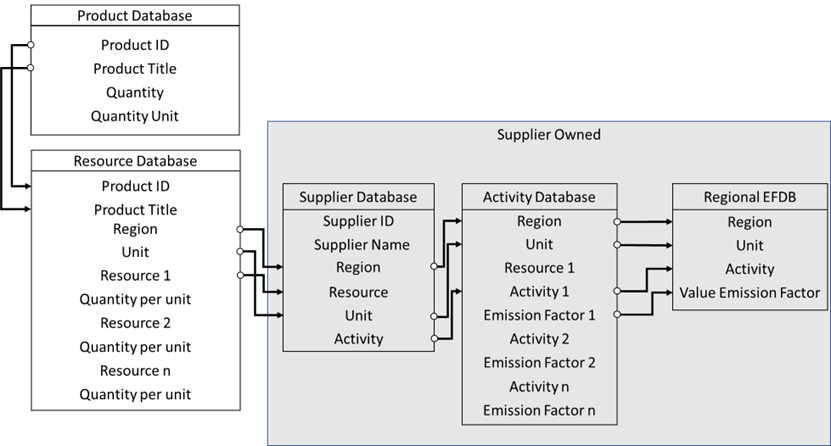